In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("covid_19_india.csv")

In [4]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [5]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [7]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [8]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [9]:
duplicates=df.duplicated()
print(duplicates.head())

0    False
1    False
2    False
3    False
4    False
dtype: bool


In [10]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [11]:
df.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [12]:
numeric_cols=["Cured","Deaths","Confirmed"]
for col in numeric_cols:
    pd.to_numeric(df[col],errors="coerce").fillna(0).astype(int)

In [13]:
summary=pd.DataFrame({"mean":df[numeric_cols].mean(),
"median":df[numeric_cols].median(),
"variance":df[numeric_cols].var()})

In [14]:
print(summary)

                    mean   median      variance
Cured      278637.518056  33364.0  3.780908e+11
Deaths       4052.402264    588.0  1.192262e+08
Confirmed  301031.401822  39773.5  4.305313e+11


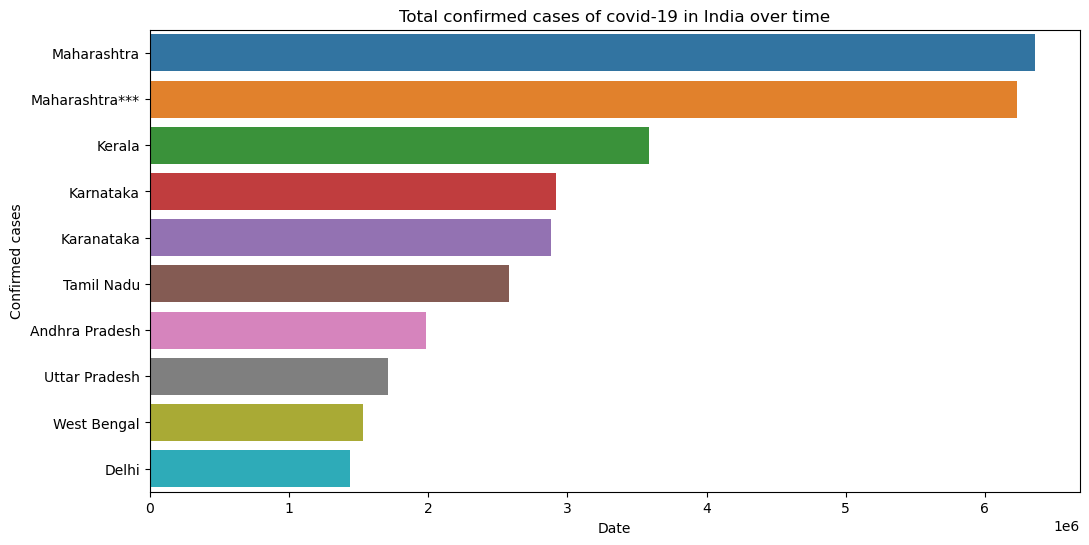

In [15]:
top_states=df.groupby("State/UnionTerritory")["Confirmed"].max().sort_values(ascending=False).head(10)

#plot total confirmed cases over time
plt.figure(figsize=(12,6))
df.groupby("Date")["Confirmed"].sum().plot
sns.barplot(x=top_states.values,y=top_states.index)
plt.title("Total confirmed cases of covid-19 in India over time")
plt.xlabel("Date")
plt.ylabel("Confirmed cases")
plt.show()

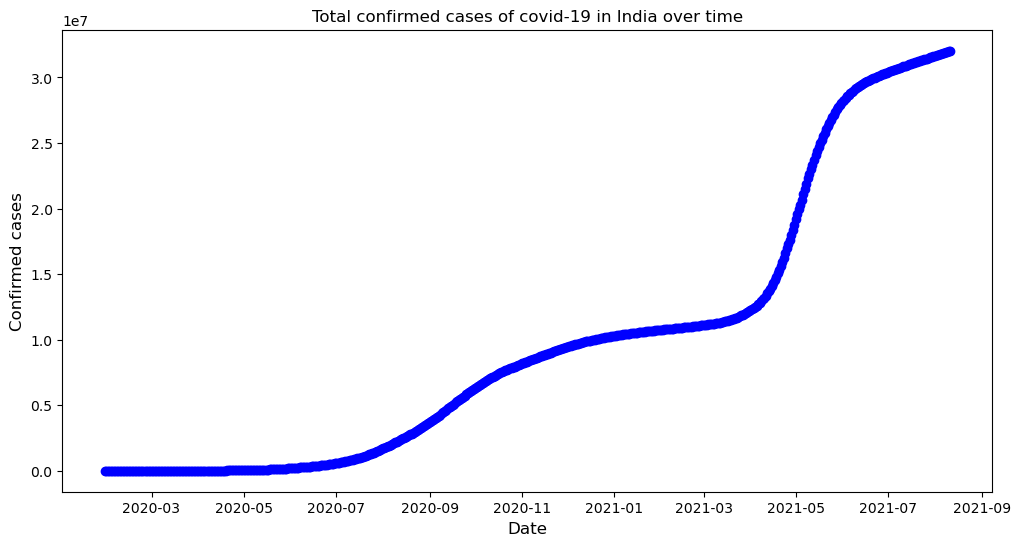

In [17]:
daily_cases=df.groupby("Date")["Confirmed"].sum()

#code for line graph
plt.figure(figsize=(12,6))
plt.plot(daily_cases.index,daily_cases.values,marker='o',color='blue')
plt.title("Total confirmed cases of covid-19 in India over time")
plt.xlabel("Date",fontsize=12)
plt.ylabel("Confirmed cases",fontsize=12)
plt.show()